In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.shape

(1599, 12)

In [8]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
import matplotlib as plt

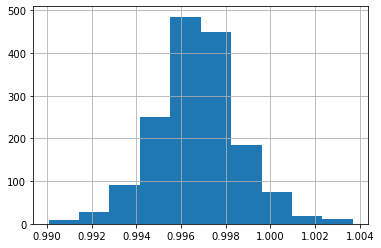

In [10]:
data['density'].hist()

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
data.quality.shape

(1599,)

In [14]:
import numpy as np
x = data.iloc[:,0:11]
y = np.ravel(data.quality)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70,test_size=0.30, random_state=0)

In [17]:
mean = x_train.mean(axis=0)
x_train = x_train-mean
std = x_train.std(axis=0)
x_train = x_train/std
x_test = x_test - mean
x_test = x_test/std

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(164, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [29]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

In [30]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [32]:
model.fit(x_train,y_train, epochs=25, batch_size=128)

Epoch 1/25
9/9 [==============================] - 0s 11ms/step - loss: 0.5514 - mse: 0.5514
Epoch 2/25
9/9 [==============================] - 0s 11ms/step - loss: 0.5541 - mse: 0.5541
Epoch 3/25
9/9 [==============================] - 0s 9ms/step - loss: 0.4991 - mse: 0.4991
Epoch 4/25
9/9 [==============================] - 0s 9ms/step - loss: 0.5414 - mse: 0.5414
Epoch 5/25
9/9 [==============================] - 0s 10ms/step - loss: 0.4868 - mse: 0.4868
Epoch 6/25
9/9 [==============================] - 0s 11ms/step - loss: 0.4614 - mse: 0.4614
Epoch 7/25
9/9 [==============================] - 0s 8ms/step - loss: 0.4636 - mse: 0.4636
Epoch 8/25
9/9 [==============================] - 0s 8ms/step - loss: 0.4163 - mse: 0.4163
Epoch 9/25
9/9 [==============================] - 0s 10ms/step - loss: 0.4574 - mse: 0.4574
Epoch 10/25
9/9 [==============================] - 0s 9ms/step - loss: 0.4005 - mse: 0.4005
Epoch 11/25
9/9 [==============================] - 0s 9ms/step - loss: 0.4197 - mse:

In [34]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print('mse ',mse)

mse  0.4839610755443573


In [35]:
y_pred = model.predict(x_test)

In [44]:
y_pred

array([[5.268107 ],
       [5.038668 ],
       [6.45139  ],
       [4.7318554],
       [5.6846776],
       [5.700415 ],
       [4.843516 ],
       [5.9804754],
       [4.4812913],
       [5.33777  ],
       [4.812083 ],
       [5.3114877],
       [5.205959 ],
       [5.013848 ],
       [5.4906354],
       [5.8779597],
       [6.447374 ],
       [5.1731267],
       [4.616447 ],
       [5.5159583],
       [5.945153 ],
       [5.098988 ],
       [5.4715724],
       [6.7156634],
       [5.5593457],
       [4.917976 ],
       [5.3124814],
       [6.250076 ],
       [4.7665715],
       [5.2269406],
       [5.536615 ],
       [5.8034663],
       [5.3186936],
       [4.78139  ],
       [5.6241927],
       [6.1465383],
       [5.088251 ],
       [5.7521844],
       [5.5310607],
       [5.6689987],
       [5.597016 ],
       [6.132016 ],
       [6.7872486],
       [6.1655054],
       [5.415647 ],
       [5.080687 ],
       [4.9609227],
       [5.4374537],
       [4.912023 ],
       [5.637338 ],


In [45]:
y_pred.max()

6.7872486

In [46]:
data['quality'].max()

8

In [49]:
y_train.max()

8